<a href="https://colab.research.google.com/github/xo-bot1997/Project-Repository/blob/main/Mwinilunga_Geochemical_Anomaly_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel('Mwinilunga Geochem (1).xlsx')

# Display the first few rows of the dataframe
data.head()

,Samplenr,X,Y,Rock_code,Co_2ppm,Ni_3ppm,Cu_2ppm
0,03DDA001,265443,8713179,Undifferentiated cover,1.4,2.1,4.0
1,03DDA002,265425,8713789,Undifferentiated cover,1.4,5.0,6.0
2,03DDA006,266540,8716568,Residual soil,3.0,7.0,4.0
3,03DDA007,266580,8716540,Residual soil,2.0,2.1,3.0
4,03DDA008,263504,8712964,Undifferentiated cover,1.4,2.1,3.0


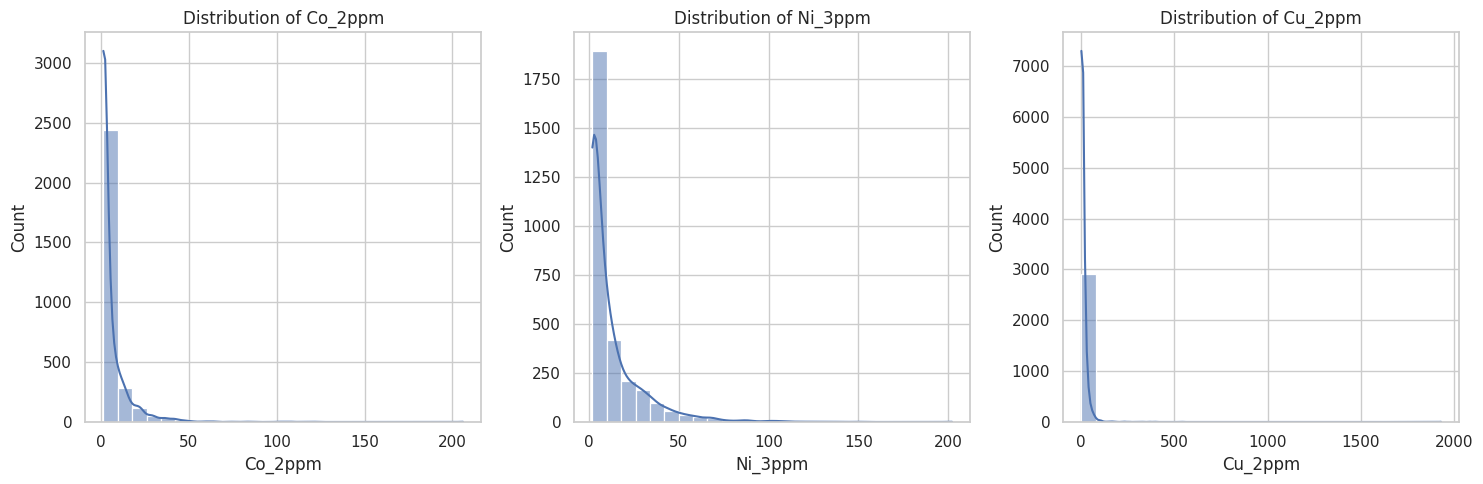

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['Co_2ppm'], bins= 25, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Co_2ppm')
sns.histplot(data['Ni_3ppm'], bins=25, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Ni_3ppm')
sns.histplot(data['Cu_2ppm'], bins= 25, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Cu_2ppm')

plt.tight_layout()
plt.show()




In [ ]:
import numpy as np

data['Co_2ppm_log'] = np.log(data['Co_2ppm'])
data['Ni_3ppm_log'] = np.log(data['Ni_3ppm'])
data['Cu_2ppm_log'] = np.log(data['Cu_2ppm'])

# Displaying the transformed data
data[['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']].head()


,Co_2ppm_log,Ni_3ppm_log,Cu_2ppm_log
0,0.336472,0.741937,1.386294
1,0.336472,1.609438,1.791759
2,1.098612,1.945910,1.386294
3,0.693147,0.741937,1.098612
4,0.336472,0.741937,1.098612


In [ ]:
# Descriptive statistics
descriptive_stats = data[['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']].describe()
print(descriptive_stats)

       Co_2ppm_log  Ni_3ppm_log  Cu_2ppm_log
count  2953.000000  2953.000000  2953.000000
mean      1.118185     1.912353     1.857712
std       1.004105     1.093302     1.049465
min       0.336472     0.741937     0.336472
25%       0.336472     0.741937     1.098612
50%       0.336472     1.791759     1.609438
75%       1.791759     2.772589     2.564949
max       5.327876     5.308268     7.565275


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the log-transformed columns
data[['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']] = scaler.fit_transform(data[['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']])

Summary statistics after standardization:
        Co_2ppm_log   Ni_3ppm_log   Cu_2ppm_log
count  2.953000e+03  2.953000e+03  2.953000e+03
mean   1.828691e-16 -1.732444e-16  9.624690e-17
std    1.000169e+00  1.000169e+00  1.000169e+00
min   -7.786491e-01 -1.070714e+00 -1.449784e+00
25%   -7.786491e-01 -1.070714e+00 -7.234429e-01
50%   -7.786491e-01 -1.103205e-01 -2.366118e-01
75%    6.709338e-01  7.869570e-01  6.740172e-01
max    4.193190e+00  3.106634e+00  5.439467e+00


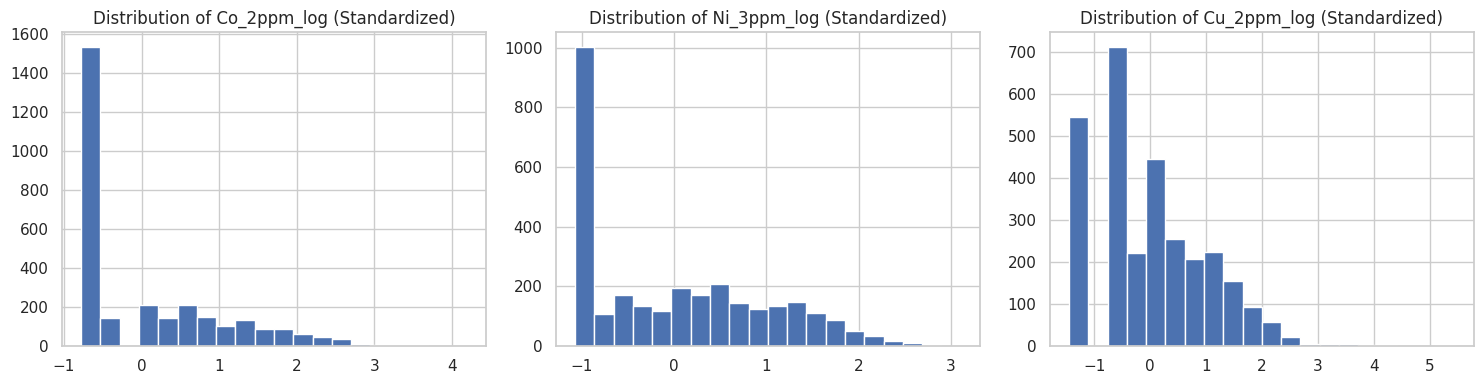

In [ ]:
import matplotlib.pyplot as plt

# Print summary statistics of standardized columns
print("Summary statistics after standardization:")
print(data[['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']].describe())

# Visualize distributions of standardized columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, col in enumerate(['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']):
    axs[i].hist(data[col], bins=20)
    axs[i].set_title(f'Distribution of {col} (Standardized)')

plt.tight_layout()
plt.show()

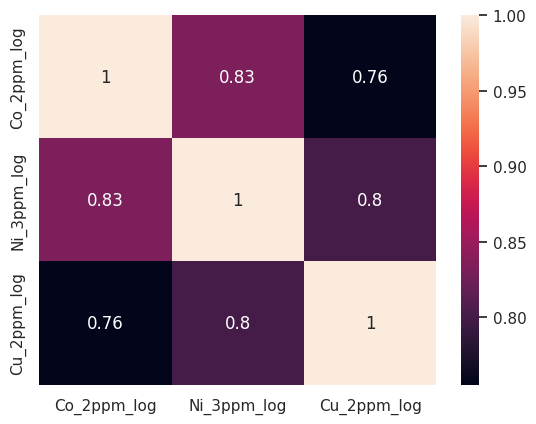

In [ ]:
# Correlation matrix
correlation_matrix = data[['Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN

# One-hot encoding the 'Rock_code' column
encoder = OneHotEncoder(sparse=False)
rock_type_encoded = encoder.fit_transform(data[['Rock_code']])
rock_type_encoded_df = pd.DataFrame(rock_type_encoded, columns=encoder.get_feature_names_out(['Rock_code']))

# Combining the encoded rock types with the log-transformed concentration values
combined_data = pd.concat([data[['Samplenr','Rock_code', 'Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']], rock_type_encoded_df], axis=1)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)
combined_data['Cluster'] = dbscan.fit_predict(combined_data.drop(['Samplenr', 'Rock_code'], axis=1))

# Extracting anomaly data points detected by DBSCAN
anomalies_dbscan = combined_data[combined_data['Cluster'] == -1][['Samplenr', 'Co_2ppm_log', 'Ni_3ppm_log', 'Cu_2ppm_log']]

# Summarize anomalies by rock type using original (non-log-transformed) data for readability
anomalies_summary_dbscan = data.loc[anomalies_dbscan.index].groupby('Rock_code')['Co_2ppm', 'Ni_3ppm', 'Cu_2ppm'].mean()

# Displaying the summary
print("Anomalies detected by DBSCAN:")
print(anomalies_summary_dbscan)

Anomalies detected by DBSCAN:
                                   Co_2ppm    Ni_3ppm    Cu_2ppm
Rock_code                                                       
Alluvium                         13.471429  30.366667  26.309524
Basic intrusion                   2.000000   5.787500   8.750000
Crete deposits                   14.937143  14.980000  91.828571
Diamictite                       11.921951  26.958537  19.253659
Gneiss, schist                    9.440000  16.505000  27.440000
Granite                           2.409091   6.977273   7.336364
Ironstone                         9.303704  29.340741  15.481481
Limestone, marble                 9.339535  23.611628  26.372093
Quartzite                        13.631818  26.752273  20.531818
Residual soil                     6.864286  19.503571  10.757143
Sand                              6.585714  17.928571  19.535714
Siltstone                        14.415789  32.344737  27.015789
Undifferentiated Katangan Rocks  22.214545  40.038182  61.20

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-18-23bcc943d5ee>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  anomalies_summary_dbscan = data.loc[anomalies_dbscan.index].groupby('Rock_code')['Co_2ppm', 'Ni_3ppm', 'Cu_2ppm'].mean()


In [ ]:
# Using the provided thresholds to classify instances as anomalies for each element

# Anomaly thresholds as per DBSCAN summary
anomaly_thresholds = {
    "Alluvium": {"Co_2ppm":  13.471429, "Ni_3ppm": 30.366667 , "Cu_2ppm": 26.309524},
    "Basic intrusion": {"Co_2ppm": 2.000000, "Ni_3ppm":  5.787500, "Cu_2ppm": 8.750000},
    "Crete deposits": {"Co_2ppm": 14.937143, "Ni_3ppm": 14.980000, "Cu_2ppm": 91.828571},
    "Diamictite": {"Co_2ppm": 11.921951, "Ni_3ppm": 26.958537, "Cu_2ppm":  19.253659},
    "Gneiss, schist": {"Co_2ppm":  9.440000, "Ni_3ppm": 16.505000 , "Cu_2ppm": 27.440000},
    "Granite": {"Co_2ppm": 2.409091, "Ni_3ppm":  6.977273, "Cu_2ppm": 7.336364},
    "Ironstone": {"Co_2ppm":  9.303704 , "Ni_3ppm": 29.340741, "Cu_2ppm": 15.481481},
    "Limestone, marble": {"Co_2ppm":  9.339535, "Ni_3ppm": 23.611628, "Cu_2ppm": 26.372093},
    "Quartzite": {"Co_2ppm":   13.631818, "Ni_3ppm":  26.752273, "Cu_2ppm": 10.757143},
    "Residual soil": {"Co_2ppm":  6.864286, "Ni_3ppm":  19.503571, "Cu_2ppm": 12.431579},
    "Sand": {"Co_2ppm":  6.585714, "Ni_3ppm": 17.928571 , "Cu_2ppm": 19.535714},
    "Siltstone": {"Co_2ppm":  14.415789, "Ni_3ppm": 32.344737, "Cu_2ppm": 27.015789},
    "Undifferentiated Katangan Rocks": {"Co_2ppm": 22.214545, "Ni_3ppm": 40.038182 , "Cu_2ppm": 61.207273},
    "Undifferentiated cover": {"Co_2ppm":  7.625000, "Ni_3ppm": 23.412500, "Cu_2ppm":  26.750000},
    "Volcanic Rocks": {"Co_2ppm":  17.97307, "Ni_3ppm": 24.50000, "Cu_2ppm": 22.07692320}
}

# Function to classify anomalies for each element
def classify_anomalies(row):
    rock_type = row['Rock_code']
    thresholds = anomaly_thresholds.get(rock_type, {})
    return {
        'Anomaly_Co': row['Co_2ppm'] > thresholds.get('Co_2ppm', float('inf')),
        'Anomaly_Ni': row['Ni_3ppm'] > thresholds.get('Ni_3ppm', float('inf')),
        'Anomaly_Cu': row['Cu_2ppm'] > thresholds.get('Cu_2ppm', float('inf'))
    }

# Apply the function to each row in the dataset
anomaly_flags = data.apply(classify_anomalies, axis=1, result_type='expand')

# Rename columns for clarity
anomaly_flags.columns = ['Anomaly_Co', 'Anomaly_Ni', 'Anomaly_Cu']

# Append these flags to the original dataset
data_with_anomalies = pd.concat([data, anomaly_flags], axis=1)

# Now perform the groupby operation on the updated DataFrame
anomaly_summary_thresholds = data_with_anomalies.groupby('Rock_code').agg({
    'Anomaly_Co': 'sum',
    'Anomaly_Ni': 'sum',
    'Anomaly_Cu': 'sum'
})

# Displaying the summary
print("Anomalies detected with specified thresholds:")
print(anomaly_summary_thresholds)

Anomalies detected with specified thresholds:
                                 Anomaly_Co  Anomaly_Ni  Anomaly_Cu
Rock_code                                                          
Alluvium                                 19          20          42
Basic intrusion                           2           3           3
Crete deposits                           12          17           4
Diamictite                               16          17          10
Gneiss, schist                           34          55          31
Granite                                  10           9          11
Ironstone                                 9          12          10
Limestone, marble                        29          33          17
Quartzite                                 9          16          28
Residual soil                            18           8           9
Sand                                     12          18          15
Siltstone                                52          61          39
Un

In [ ]:
# Loading table 6 anomaly data for each element into Pandas DataFrames
traditional_co = pd.read_excel('Anomalous Table 6_Co.xlsx')
traditional_cu = pd.read_excel('Anomalous Table 6_Cu.xlsx')
traditional_ni = pd.read_excel('Anomalous Table 6_Ni.xlsx')

# Preparing DBSCAN results for comparison
dbscan_anomalies_co = data_with_anomalies[data_with_anomalies['Anomaly_Co']]
dbscan_anomalies_cu = data_with_anomalies[data_with_anomalies['Anomaly_Cu']]
dbscan_anomalies_ni = data_with_anomalies[data_with_anomalies['Anomaly_Ni']]

# Function to compare anomalies for each element
def compare_anomalies(dbscan_anomalies, traditional_anomalies):
    merged_data = pd.merge(dbscan_anomalies, traditional_anomalies, on=['Samplenr', 'Rock_code'], how='outer', indicator=True)
    common = merged_data[merged_data['_merge'] == 'both']
    unique_dbscan = merged_data[merged_data['_merge'] == 'left_only']
    unique_traditional = merged_data[merged_data['_merge'] == 'right_only']
    return common, unique_dbscan, unique_traditional

# Compare anomalies for each element
common_anomalies_co, unique_dbscan_co, unique_traditional_co = compare_anomalies(dbscan_anomalies_co, traditional_co)
common_anomalies_cu, unique_dbscan_cu, unique_traditional_cu = compare_anomalies(dbscan_anomalies_cu, traditional_cu)
common_anomalies_ni, unique_dbscan_ni, unique_traditional_ni = compare_anomalies(dbscan_anomalies_ni, traditional_ni)

# Analyze the comparison results and print the count of common and unique anomalies for Cobalt (Co)
print(f"Common Co Anomalies: {len(common_anomalies_co)}")
print(f"Unique DBSCAN Co Anomalies: {len(unique_dbscan_co)}")
print(f"Unique Traditional Co Anomalies: {len(unique_traditional_co)}")

#  print the count of common and unique anomalies for Copper (Cu)
print(f"Common Cu Anomalies: {len(common_anomalies_cu)}")
print(f"Unique DBSCAN Cu Anomalies: {len(unique_dbscan_cu)}")
print(f"Unique Traditional Cu Anomalies: {len(unique_traditional_cu)}")

#  print the count of common and unique anomalies for Nickel (Ni)
print(f"Common Ni Anomalies: {len(common_anomalies_ni)}")
print(f"Unique DBSCAN Ni Anomalies: {len(unique_dbscan_ni)}")
print(f"Unique Traditional Ni Anomalies: {len(unique_traditional_ni)}")

Common Co Anomalies: 60
Unique DBSCAN Co Anomalies: 262
Unique Traditional Co Anomalies: 1
Common Cu Anomalies: 65
Unique DBSCAN Cu Anomalies: 218
Unique Traditional Cu Anomalies: 15
Common Ni Anomalies: 30
Unique DBSCAN Ni Anomalies: 363
Unique Traditional Ni Anomalies: 0
